In [2]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys


# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(BASE_DIR)

ANALYSIS_DIR = os.path.join(BASE_DIR, 'scripts', 'analysis')
sys.path.append(ANALYSIS_DIR)

DATA_PATH = BASE_DIR + '/data'

In [4]:
from titration_fitting import fit_bootstrap, curve_func_new 

In [5]:
df = pd.read_json(f"{DATA_PATH}/wt_mg_titra.json")
df = df[df['exp_name'] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]
df_uucg = pd.read_json(f"{DATA_PATH}/uucg_mg_titra.json")
df_notlr = pd.read_json(f"{DATA_PATH}/no_tlr_mg.json")
df_no_3x3 = pd.read_json(f"{DATA_PATH}/no_3x3_mg_titra.json")
df_h1_longer = pd.read_json(f"{DATA_PATH}/h1_3bp_longer_mg_titra.json")
df_h2_longer = pd.read_json(f"{DATA_PATH}/h2_3bp_longer_mg_titra.json")
df_h3_longer = pd.read_json(f"{DATA_PATH}/h3_3bp_longer_mg_titra.json")

### style functions

In [6]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)

### plotting functions

In [7]:
def normalize_data(data):
    if np.min(data) == np.max(data):
        return data
    return (data - np.min(data)) / (np.max(data) - np.min(data))


def compute_mg_1_2(mg_conc, norm_data ):
    pstart = [1, 1]
    pfit, perr = fit_bootstrap(pstart, mg_conc, norm_data, curve_func_new)
    return pfit, perr

def publication_titration_plot(g, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    mg_conc = list(g["mg_conc"])
    data = list(g["gaaa_avg"])
    norm_data = -normalize_data(np.array(data)) + 1
    r = compute_mg_1_2(mg_conc, norm_data)
    plt.scatter(g["mg_conc"], norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.01):
        p = r[0]
        y = curve_func_new(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, label=name, lw=3)

/Users/jyesselman2/Dropbox/projects/papers/q_dms_ttr_paper/scripts/analysis/titration_fitting.py:13: RuntimeWarning: invalid value encountered in power
  return ((conc / K) ** n) / (1 + (conc / K) ** n)


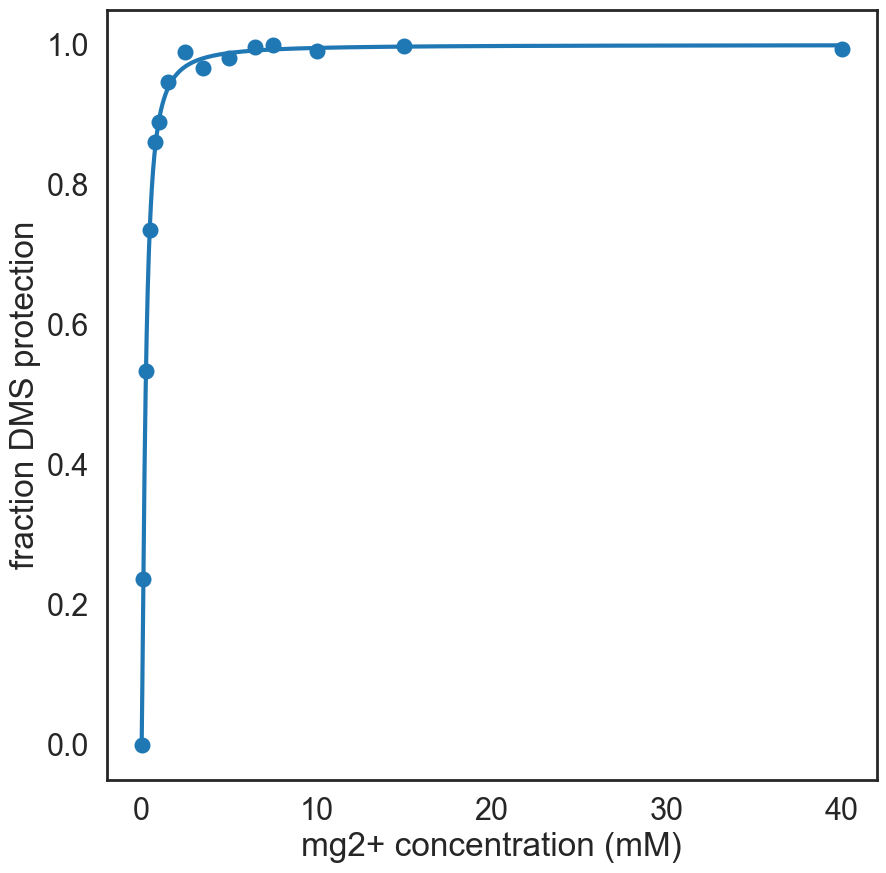

In [8]:
fig, ax = plt.subplots()
df_sub = df[df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]
publication_titration_plot(df_sub, "50 mM", ax=ax)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)


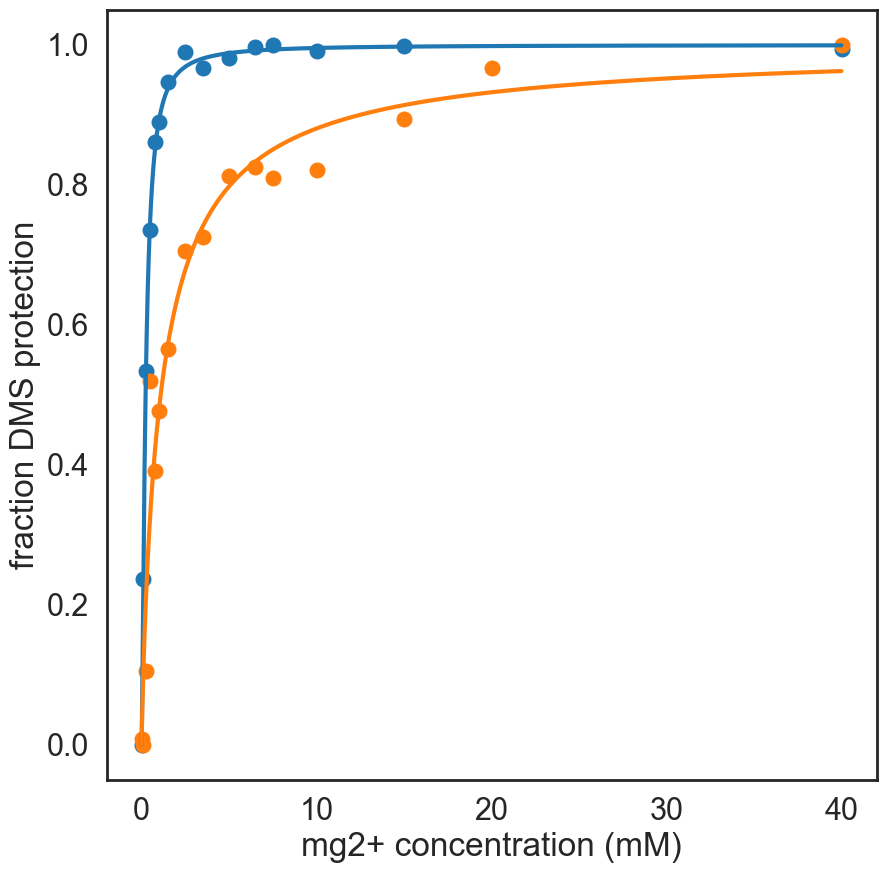

In [9]:
fig, ax = plt.subplots()
publication_titration_plot(df, "Wild type", ax=ax)
publication_titration_plot(df_h1_longer, "Helix 1 extended", ax=ax)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)


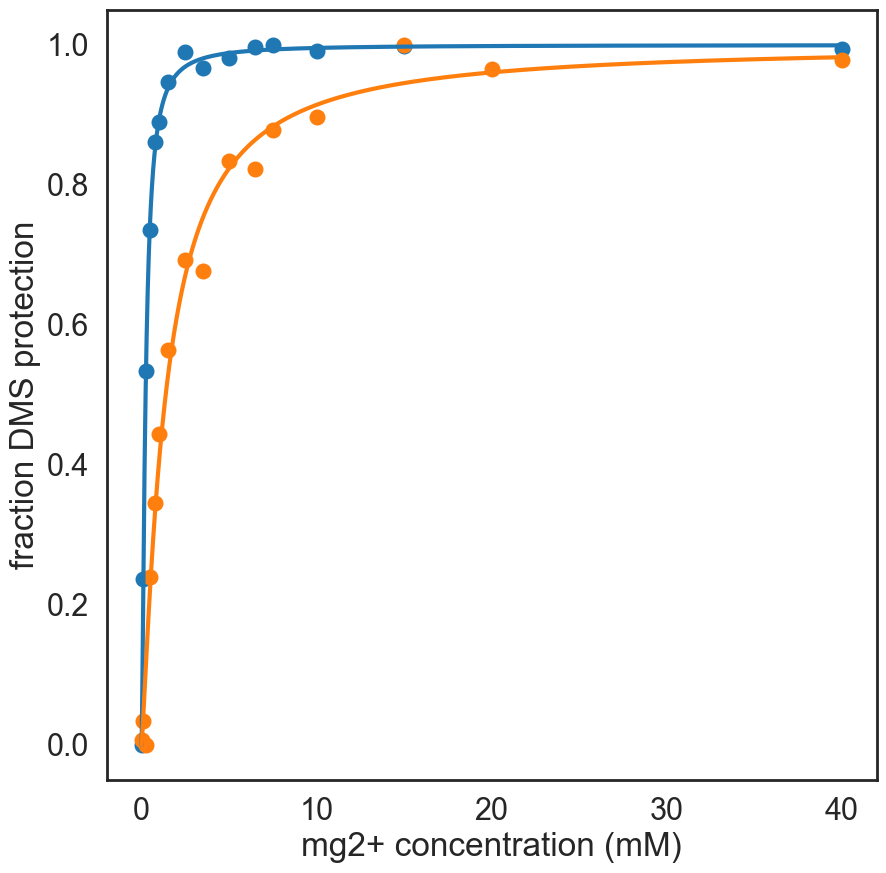

In [10]:
fig, ax = plt.subplots()
publication_titration_plot(df, "Wild type", ax=ax)
publication_titration_plot(df_h2_longer, "Helix 2 extended", ax=ax)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)


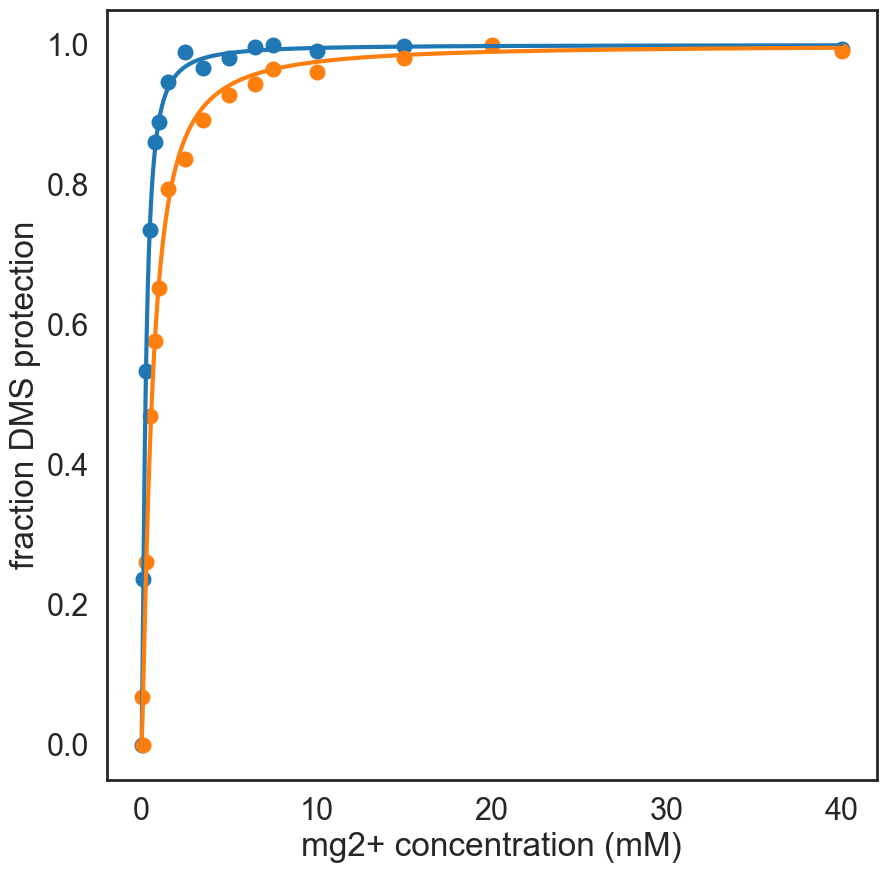

In [11]:
fig, ax = plt.subplots()
publication_titration_plot(df, "Wild type", ax=ax)
publication_titration_plot(df_h3_longer, "Helix 3 extended", ax=ax)
publication_style_ax(ax)
ax.set_ylabel("fraction DMS protection")
ax.set_xlabel("mg2+ concentration (mM)")
ax.set_box_aspect(1)
